In [1]:
%matplotlib inline
### import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns  
from sklearn import metrics

In [3]:
# Read the csv file and save as a Dataframe
df = pd.read_csv('health care diabetes.csv')

In [4]:
#Check first few rows of the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0    478
1    251
Name: Outcome, dtype: int64


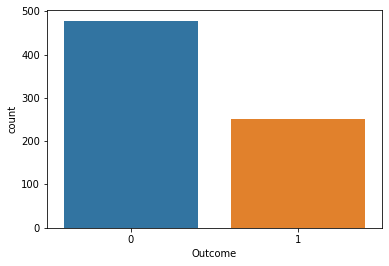

In [47]:
print(df['Outcome'].value_counts())
sns.countplot(x ='Outcome', data = df) 

In [5]:
#Check for Nulls and Missing Values
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

###### From the above we see that there are no Null values for any of the columns in the dataset

In [6]:
#Checking for zero values
df[df == 0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:
#Replacing all zero values with the mean of respective variables
data = df[df['Glucose'] != 0]
df = df[df['BloodPressure'] != 0]
df = df[df['BMI'] != 0]
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df[df == 0].count()

Pregnancies                  99
Glucose                       5
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     478
dtype: int64

In [8]:
#Check the Datatype of each variable in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 729 non-null int64
Glucose                     729 non-null int64
BloodPressure               729 non-null int64
SkinThickness               729 non-null int64
Insulin                     729 non-null int64
BMI                         729 non-null float64
DiabetesPedigreeFunction    729 non-null float64
Age                         729 non-null int64
Outcome                     729 non-null int64
dtypes: float64(2), int64(7)
memory usage: 57.0 KB


In [9]:
target = df.Outcome
data = df.drop('Outcome', axis=1)

In [11]:
#Separate data with Positive outcomes in a dataframe "Positive"
Positive = df[df['Outcome']==1]
Positive.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,46,33.6,0.627,50,1
2,8,183,64,24,46,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


### Visualizations: Week 1: Variables Histograms

100    16
99     15
Name: Glucose, dtype: int64


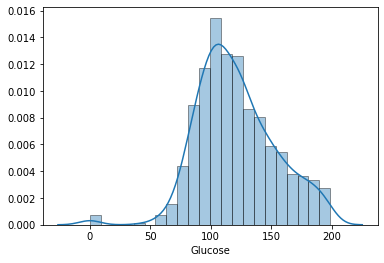

In [12]:
#Glucose
print(data['Glucose'].value_counts().head(2))
sns.distplot(data['Glucose'],hist_kws=dict(edgecolor="k", linewidth=1))

70    57
74    52
Name: BloodPressure, dtype: int64


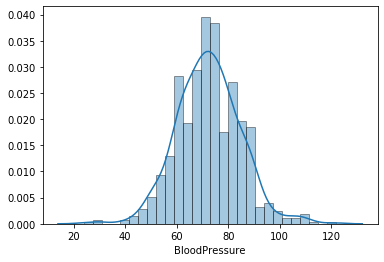

In [13]:
#BloodPressure
print(data['BloodPressure'].value_counts().head(2))
sns.distplot(data['BloodPressure'],hist_kws=dict(edgecolor="k", linewidth=1))

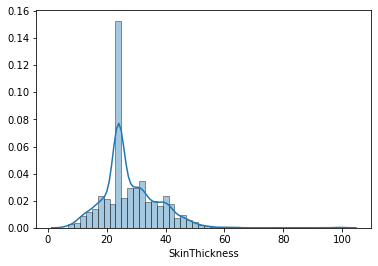

In [14]:
#SkinThickness
data['SkinThickness'].value_counts().head(2)
sns.distplot(data['SkinThickness'],hist_kws=dict(edgecolor="k", linewidth=1))

46     337
105     11
Name: Insulin, dtype: int64


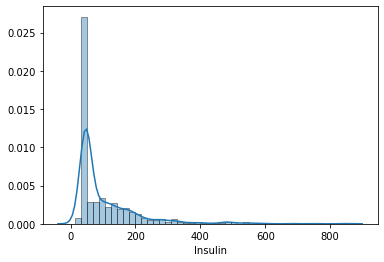

In [15]:
#Insulin
print(data['Insulin'].value_counts().head(2))
sns.distplot(data['Insulin'],hist_kws=dict(edgecolor="k", linewidth=1))

32.0    13
31.6    12
31.2    12
33.3    10
32.8     9
30.8     9
32.4     9
Name: BMI, dtype: int64


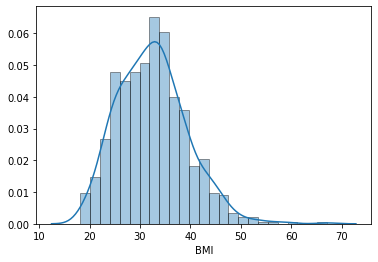

In [16]:
#BMI
print(data['BMI'].value_counts().head(7))
sns.distplot(data['BMI'],hist_kws=dict(edgecolor="k", linewidth=1))

In [17]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,729.0,3.858711,3.357468,0.000,1.000,3.000,6.000,17.00
Glucose,729.0,121.046639,32.255215,0.000,99.000,117.000,141.000,199.00
BloodPressure,729.0,72.367627,12.375838,24.000,64.000,72.000,80.000,122.00
SkinThickness,729.0,27.820302,9.299907,7.000,24.000,24.000,33.000,99.00
Insulin,729.0,105.148148,102.980247,14.000,46.000,46.000,130.000,846.00
BMI,729.0,32.469959,6.885098,18.200,27.500,32.400,36.600,67.10
DiabetesPedigreeFunction,729.0,0.474117,0.331649,0.078,0.245,0.378,0.627,2.42
Age,729.0,33.318244,11.753078,21.000,24.000,29.000,41.000,81.00


### Visulaiztions Week 2: Scatter Plots

31.6    7
32.9    7
Name: BMI, dtype: int64


(array([ 8., 10., 21., 38., 40., 40., 28., 18., 13., 14.,  9.,  4.,  3.,
         2.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([22.9 , 25.11, 27.32, 29.53, 31.74, 33.95, 36.16, 38.37, 40.58,
        42.79, 45.  , 47.21, 49.42, 51.63, 53.84, 56.05, 58.26, 60.47,
        62.68, 64.89, 67.1 ]),
 <a list of 20 Patch objects>)

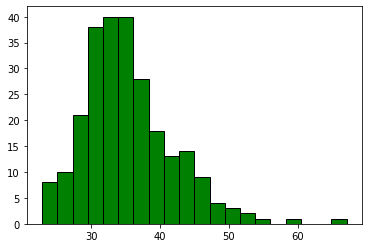

In [18]:
print(Positive['BMI'].value_counts().head(2))
plt.hist(Positive['BMI'],histtype='barstacked',bins=20, edgecolor='black', linewidth=1, color='green')

128    6
125    6
Name: Glucose, dtype: int64


(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 27., 24., 33.,
        23., 25., 22., 23., 21., 23., 14.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 <a list of 20 Patch objects>)

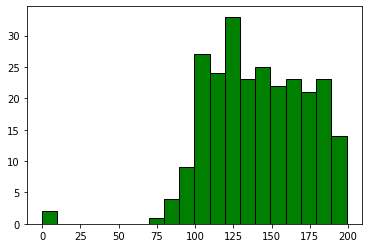

In [19]:
print(Positive['Glucose'].value_counts().head(2))
plt.hist(Positive['Glucose'],histtype='barstacked',bins=20,edgecolor='black', linewidth=1, color='green')

70    23
76    18
Name: BloodPressure, dtype: int64


(array([ 1.,  0.,  1.,  0.,  6.,  5.,  3., 17., 25., 35., 52., 30., 25.,
        23., 14.,  3.,  3.,  3.,  2.,  3.]),
 array([ 30. ,  34.2,  38.4,  42.6,  46.8,  51. ,  55.2,  59.4,  63.6,
         67.8,  72. ,  76.2,  80.4,  84.6,  88.8,  93. ,  97.2, 101.4,
        105.6, 109.8, 114. ]),
 <a list of 20 Patch objects>)

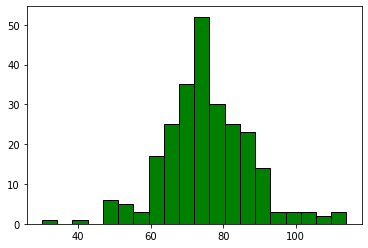

In [20]:
print(Positive['BloodPressure'].value_counts().head(2))
plt.hist(Positive['BloodPressure'],histtype='barstacked',bins=20, edgecolor='black', linewidth=1, color='green')

24    78
32    14
Name: SkinThickness, dtype: int64


(array([ 1.,  5., 11., 93., 25., 40., 34., 20., 15.,  4.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 7. , 11.6, 16.2, 20.8, 25.4, 30. , 34.6, 39.2, 43.8, 48.4, 53. ,
        57.6, 62.2, 66.8, 71.4, 76. , 80.6, 85.2, 89.8, 94.4, 99. ]),
 <a list of 20 Patch objects>)

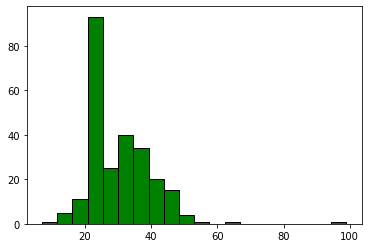

In [21]:
print(Positive['SkinThickness'].value_counts().head(2))
plt.hist(Positive['SkinThickness'],histtype='barstacked',bins=20, edgecolor='black', linewidth=1, color='green')

46     121
130      6
Name: Insulin, dtype: int64


(array([125.,  12.,  27.,  31.,  18.,  10.,   8.,   5.,   2.,   1.,   1.,
          6.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 14. ,  55.6,  97.2, 138.8, 180.4, 222. , 263.6, 305.2, 346.8,
        388.4, 430. , 471.6, 513.2, 554.8, 596.4, 638. , 679.6, 721.2,
        762.8, 804.4, 846. ]),
 <a list of 20 Patch objects>)

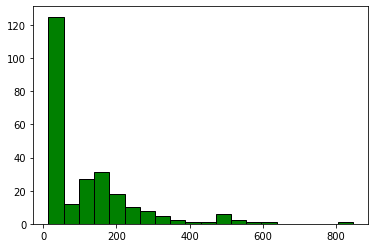

In [22]:
print(Positive['Insulin'].value_counts().head(2))
plt.hist(Positive['Insulin'],histtype='barstacked',bins=20, edgecolor='black', linewidth=1, color='green')

###### Scatter plots

In [23]:
BloodPressure = Positive['BloodPressure']
Glucose = Positive['Glucose']
SkinThickness = Positive['SkinThickness']
Insulin = Positive['Insulin']
BMI = Positive['BMI']

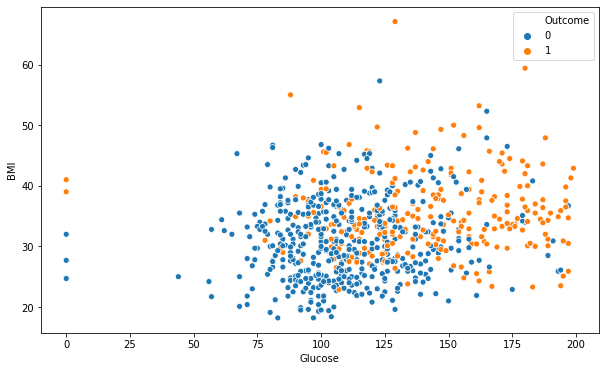

In [24]:
plt.subplots(figsize=(10,6))
g =sns.scatterplot(x= "Glucose" ,y= "BMI",hue="Outcome",data=df);

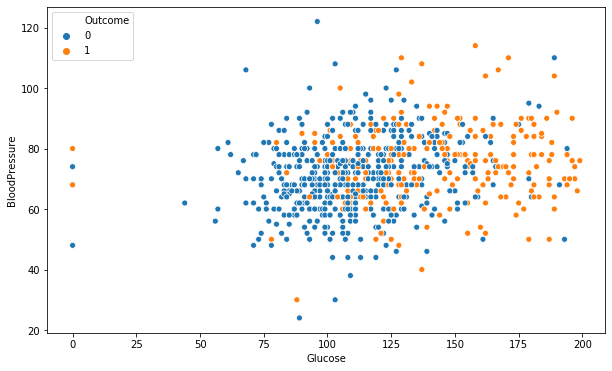

In [25]:
plt.subplots(figsize=(10,6))
g =sns.scatterplot(x= "Glucose" ,y= "BloodPressure",hue="Outcome",data=df);

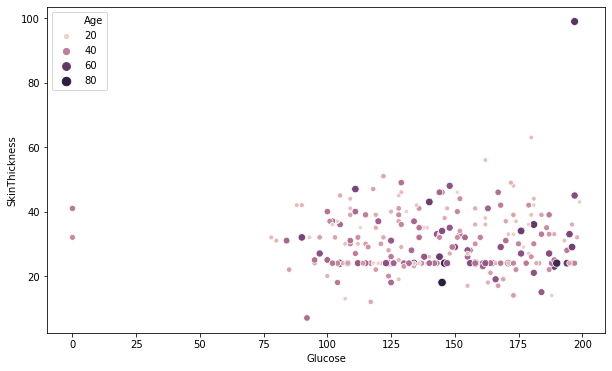

In [46]:
plt.subplots(figsize=(10,6))
O =sns.scatterplot(x= "Glucose" ,y= "SkinThickness",hue="Age",size = 'Age', data=Positive);


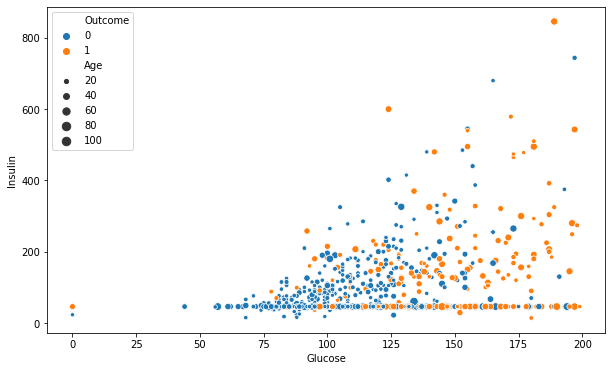

In [27]:
plt.subplots(figsize=(10,6))
S =sns.scatterplot(x= "Glucose" ,y= "Insulin",hue="Outcome", data=df, size = 'Age');

##### From the above scatter plots we have the following Conclusions:
        1. Higher Blood Pressure for people with higher glucode levels
        2. Higher Glucose levels for low Insulin values

In [28]:
### correlation matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.136122,0.211173,0.037591,-0.048500,0.015902,-0.023323,0.558903,0.227563
Glucose,0.136122,1.000000,0.221514,0.164014,0.374031,0.209968,0.136968,0.260216,0.459236
BloodPressure,0.211173,0.221514,1.000000,0.157601,-0.017639,0.289230,0.001987,0.325947,0.168245
SkinThickness,0.037591,0.164014,0.157601,1.000000,0.209954,0.563735,0.139100,0.064541,0.203507
Insulin,-0.048500,0.374031,-0.017639,0.209954,1.000000,0.194949,0.172813,-0.003026,0.170114
BMI,0.015902,0.209968,0.289230,0.563735,0.194949,1.000000,0.156613,0.024689,0.303431
DiabetesPedigreeFunction,-0.023323,0.136968,0.001987,0.139100,0.172813,0.156613,1.000000,0.025966,0.186492
Age,0.558903,0.260216,0.325947,0.064541,-0.003026,0.024689,0.025966,1.000000,0.249033
Outcome,0.227563,0.459236,0.168245,0.203507,0.170114,0.303431,0.186492,0.249033,1.000000


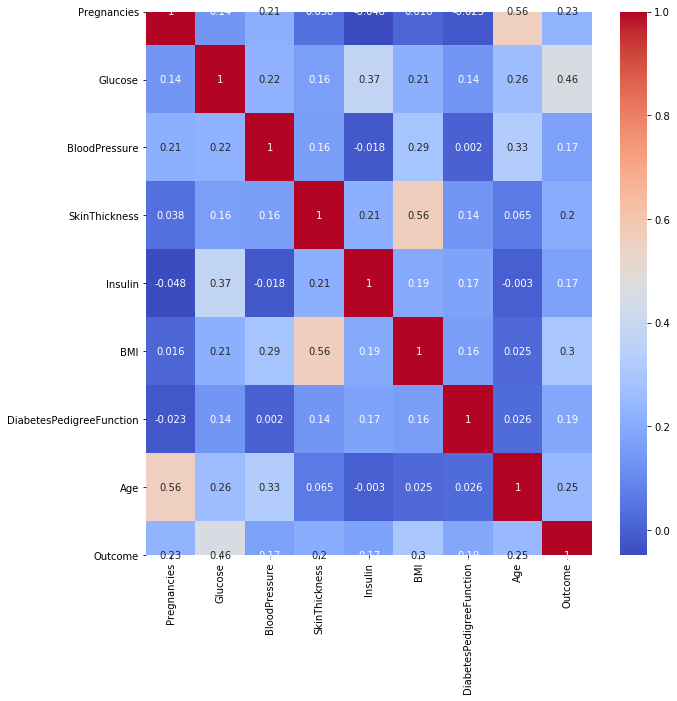

In [29]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")  ### gives correlation value

#### We can see that there is not much strong positive correlation between some of the variables.Noteworthy mentions would be Age~Glucose, Glucose~outcome and BMI~Skin Thickness

In [30]:
# Logistic Regreation and model building

In [31]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,46,33.6,0.627,50,1
1,1,85,66,29,46,26.6,0.351,31,0
2,8,183,64,24,46,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.3,random_state =101)

In [33]:
#Create model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train) 
lr = model_lr.predict(X_test)

C:\Users\s.kumar.samal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.7853881278538812
[[125   8]
 [ 39  47]]

 Classification Report::
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       133
           1       0.85      0.55      0.67        86

    accuracy                           0.79       219
   macro avg       0.81      0.74      0.75       219
weighted avg       0.80      0.79      0.77       219
 


 ROC Curve


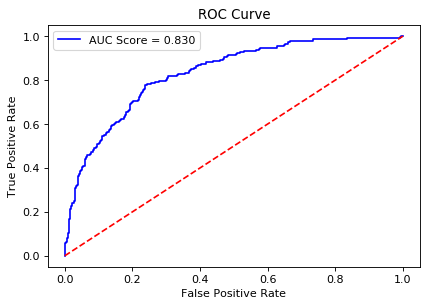

In [34]:
#Model Validation
print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,lr))
print(metrics.confusion_matrix(y_test, lr))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,lr),'\n')
print("\n","ROC Curve")
lr_prob=model_lr.predict_proba(data)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(target,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.3f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [35]:
#Applying Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth=5)
model_dt.fit(X_train,y_train)
dt = model_dt.predict(X_test)

Model Validation ==>

Accuracy Score of Decision Tree Model::
0.6940639269406392
[[117  16]
 [ 51  35]]

 Classification Report::
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       133
           1       0.69      0.41      0.51        86

    accuracy                           0.69       219
   macro avg       0.69      0.64      0.64       219
weighted avg       0.69      0.69      0.67       219
 


 ROC Curve


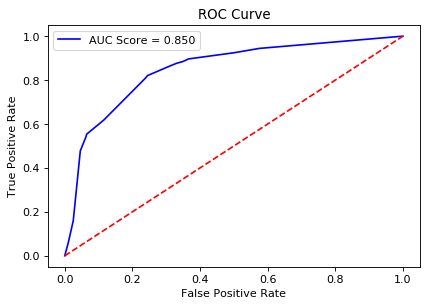

In [36]:
#Model Validation
print("Model Validation ==>\n")
print("Accuracy Score of Decision Tree Model::")
print(metrics.accuracy_score(y_test,dt))
print(metrics.confusion_matrix(y_test, dt))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,dt),'\n')
print("\n","ROC Curve")
dt_prob=model_dt.predict_proba(data)
dt_prob1=dt_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(target,dt_prob1)
roc_auc_dt=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.3f'%roc_auc_dt)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [37]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=11)
model_rfc.fit(X_train,y_train)
rfc = model_rfc.predict(X_test)

In [38]:
model_rfc.score(X_train,y_train)

0.9921568627450981

In [39]:
model_rfc.score(X_test,y_test)

0.6986301369863014

Model Validation ==>

Accuracy Score of Random Forest Classifier::
0.6986301369863014
[[112  21]
 [ 45  41]]

 Classification Report::
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       133
           1       0.66      0.48      0.55        86

    accuracy                           0.70       219
   macro avg       0.69      0.66      0.66       219
weighted avg       0.69      0.70      0.69       219
 


 ROC Curve


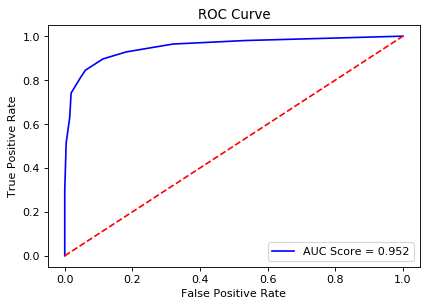

In [40]:
#Model Validation
print("Model Validation ==>\n")
print("Accuracy Score of Random Forest Classifier::")
print(metrics.accuracy_score(y_test,rfc))
print(metrics.confusion_matrix(y_test, rfc))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,rfc),'\n')
print("\n","ROC Curve")
rfc_prob=model_rfc.predict_proba(data)
rfc_prob1=rfc_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(target,rfc_prob1)
roc_auc_rfc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.3f'%roc_auc_rfc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [41]:
#Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p = 2)
model_knn.fit(X_train,y_train)
knn = model_knn.predict(X_test)

Model Validation ==>

Accuracy Score of K-NN Classifier::
0.7351598173515982
[[111  22]
 [ 36  50]]

 Classification Report::
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       133
           1       0.69      0.58      0.63        86

    accuracy                           0.74       219
   macro avg       0.72      0.71      0.71       219
weighted avg       0.73      0.74      0.73       219
 


 ROC Curve


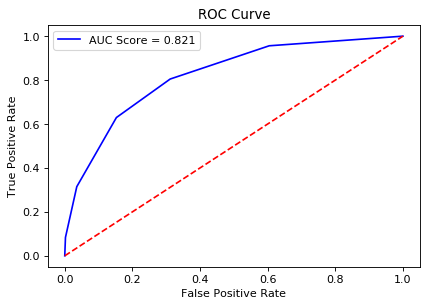

In [42]:
#Model Validation
print("Model Validation ==>\n")
print("Accuracy Score of K-NN Classifier::")
print(metrics.accuracy_score(y_test,knn))
print(metrics.confusion_matrix(y_test, knn))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,knn),'\n')
print("\n","ROC Curve")
knn_prob=model_knn.predict_proba(data)
knn_prob1=knn_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(target,knn_prob1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.3f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [43]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear',random_state=0,probability=True,C=1) 
model_svc.fit(X_train,y_train)
svc=model_svc.predict(X_test)

Model Validation ==>

Accuracy Score of VSC::
0.771689497716895
[[123  10]
 [ 40  46]]

 Classification Report::
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       133
           1       0.82      0.53      0.65        86

    accuracy                           0.77       219
   macro avg       0.79      0.73      0.74       219
weighted avg       0.78      0.77      0.76       219
 


 ROC Curve


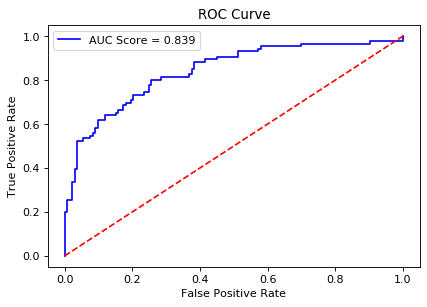

In [44]:
#Model Validation
print("Model Validation ==>\n")
print("Accuracy Score of VSC::")
print(metrics.accuracy_score(y_test,svc))
print(metrics.confusion_matrix(y_test, svc))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,svc),'\n')
print("\n","ROC Curve")
svc_prob=model_svc.predict_proba(X_test)
svc_prob1=svc_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.3f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### From all the above models, we see Logistic Regression giving an Accuracy value of 79% and AUC of 0.83. We also see these count of False positives to be low with a higher f1 score . Although similar results are provided by KNN(Accuracy 74% auc 0.82) , but we chose Logistic Regression on account of higher Accuracy
   